## Plan notatnika jest nastepujący:

1.   działania na tabelach (`numpy.array`),
2.   obsługa generatorów liczb losowych (`numpy.random`),
3.   zdobywanie rzeczywistych zbiorów danych.

Powyższe elementy przygotują Cię do pracy z prawdziwymi danymi i do wykonywania obliczeń i symulacji.

**Pamiętaj eksperymentować** z każdą komórką, jaką się da. Uruchom swoją wyobraźnię.

## Tabele i macierze: przekształcenia i obliczenia 

**Tabela** (ang. **array**) nie jest natywną strukturą danych języka Python. Trzeba ją importować z biblioteki `numpy`.  

Przez **macierz** będziemy rozumieć tabelę, która ma określone dwa wymiary.

In [1]:
import numpy as np

In [2]:
tab = np.arange(12) + 1
print(tab)

[ 1  2  3  4  5  6  7  8  9 10 11 12]


W tym miejscu warto odnotować wybrane funkcje biblioteki `numpy` służące do generowania często używanych tabel. Zanim zabierzesz się do pisania programu, który tworzy tabelę/macierz wypełnioną w sposób regularny wartościami liczbowymi, warto przejrzeć tę listę. Może nawet dodać do niej coś od siebie.<br>
`arange`, `linspace`, `zeros`, `ones`, `zeros_like`, `ones_like`, `empty`, `empty_like`, `eye`, ... <br>
Inne ciekawe znajdziesz w części poświęconej generatorom liczb losowych. 

In [4]:
np.linspace(3, 10, num = 15)

array([ 3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,  6.5,  7. ,  7.5,  8. ,
        8.5,  9. ,  9.5, 10. ])

**Rozmiar** i **kształt** (ang. *shape*) tabeli

In [5]:
tab.size

12

In [6]:
tab.shape

(12,)

Kształt tabeli jest określony krotką, która może mieć potencjalnie dowolny wymiar. <br>
Tutaj `tab` jest jedowymiarowa lub *płaska* (ang. *flat*).

Kształt tabeli (ale oczywiście nie rozmiar) można zmieniać poleceniem `reshape`.

In [7]:
mat = tab.reshape(4, 3)
print(mat)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [8]:
print(mat.size)
print(mat.shape)

12
(4, 3)


Argument `-1` oznacza ,,oblicz sobie samodzielnie''.

In [9]:
tab.reshape(4, -1)

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

**Ćwiczenie 1**: spróbuj zmodyfikować macierz `tab` by miała 5 wierszy - czy wiesz czemu jest to niemożliwe?

In [10]:
tab.reshape(5, -1)

ValueError: cannot reshape array of size 12 into shape (5,newaxis)

Czasem biblioteczne procedury wymagają podania tabel dwuwymiarowych, nawet jeżeli składa się na nie jedna kolumna (jeden wiersz). Ponadto, mogą wymagać okreslonego układu: kolumnowego lub wierszowego. <br>
Oto wygodny sposób przekształcenia płaskiej tabeli na wiersz lub kolumnę macierzy.  

In [14]:
tab.reshape(1, -1)

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]])

In [13]:
mat = tab.reshape(-1, 1)
print(mat)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]]


In [15]:
print(tab.shape)
print(mat.shape)

(12,)
(12, 1)


A teraz <font color='red'>uwaga</font>:

In [19]:
mat = tab.reshape(4, 3)
print(tab)
print(mat, end="\n\n")
mat[1, 1] = 0
print(mat)
print(tab)

[ 1  2  3  4  0  6  7  8  9 10 11 12]
[[ 1  2  3]
 [ 4  0  6]
 [ 7  8  9]
 [10 11 12]]

[[ 1  2  3]
 [ 4  0  6]
 [ 7  8  9]
 [10 11 12]]
[ 1  2  3  4  0  6  7  8  9 10 11 12]


Zmieniając `mat`, wpłyneliśmy na `tab`. <br>
Mówimy, że `mat` jest *widokiem* (ang. *view*) na `tab`, bo wskazuje na ten sam obszar w pamięci, ale w inny sposób.

Jeżeli nie o to nam chodzi, trzeba w sposób jawny utworzyć `mat` jako kopię przekształconej wersji `tab`.

In [20]:
mat = tab.reshape(4, 3).copy()
print(tab)
print(mat, end="\n\n")
mat[1, 1] = 100
print(mat)
print(tab)

[ 1  2  3  4  0  6  7  8  9 10 11 12]
[[ 1  2  3]
 [ 4  0  6]
 [ 7  8  9]
 [10 11 12]]

[[  1   2   3]
 [  4 100   6]
 [  7   8   9]
 [ 10  11  12]]
[ 1  2  3  4  0  6  7  8  9 10 11 12]


**Zapamiętaj**: ponieważ zmienne (nazwy) w języku Python to wskaźniki do obiektów, jedynym możliwym rezultatem przypisania <br>
 ```zmienna2 = zmienna1``` <br>
 jest uzyskanie dwóch zmiennych wskazujących na ten sam obiekt. <br>
 Jeżeli potrzeba kopii obiektu, to nową zmienną tworzymy w ten sposób: <br>
 ```zmienna2 = zmienna1.copy()``` <br>
 lub <br>
 ```zmienna2 = zmienna1.deepcopy()``` <br>
 w przypadku gdy `zmienna1` jest strukturą zagnieżdżoną (np. listą list).

**Złożenia** tabel/macierzy. <br>
Przydają się, gdy zachodzi potrzeba połączenia różnych zestawów danych w ramach jednej większej struktury.

In [22]:
A = np.arange(6).reshape(2, 3)
B = np.arange(7, 13).reshape(2, 3)
print(A, B, sep="\n", end="\n\n")
print(np.vstack([A, B]), end="\n\n")
print(np.hstack([A, B]))

[[0 1 2]
 [3 4 5]]
[[ 7  8  9]
 [10 11 12]]

[[ 0  1  2]
 [ 3  4  5]
 [ 7  8  9]
 [10 11 12]]

[[ 0  1  2  7  8  9]
 [ 3  4  5 10 11 12]]


A czasem trzeba zrobić coś odwrotnego, to znaczy ,,spłaszczyć'' tabelę.

In [23]:
A.flatten()

array([0, 1, 2, 3, 4, 5])

**Obliczenia macierzowe** <br>
Dotyczą tabel dwuwymiarowych, które można mnożyć, odwracać, transponować. Z macierzy można też policzyć wyznacznik. <br>
Pamiętasz, **co to jest** wyznacznik? Nie jak się go liczy, ale czym konkretnie on jest?

Podbiblioteka `numpy.linalg` implementuje ważne operacje algebry liniowej.

In [24]:
from numpy.linalg import det, inv

Najpierw przygotujemy jakąś macierz `A` na potrzeby eksperymentowania.

In [25]:
tab = np.arange(4) + 1
tab**2 - tab

array([ 0,  2,  6, 12])

In [33]:
tab = tab.reshape(1, -1)

A = np.dot(tab.T, np.flip(tab))
A[2, :] = np.arange(4)
A[:, 2] = -1
A[-2, 2] += 2
A[A > 8] = -3
print(A)

[[ 4  3 -1  1]
 [ 8  6 -1  2]
 [ 0  1  1  3]
 [-3 -3 -1  4]]


In [27]:
det(A)

-27.999999999999996

**Ćwiczenie 2**: Jak można zorientować się po wyniku, które z dwóch działań <br>
```python
A @ inv(A)
A * inv(A)
```
realizuje mnożenie macierzowe?

In [35]:
A @ inv(A)
A * inv(A)

array([[-8.42857143,  3.85714286,  0.53571429,  0.28571429],
       [20.28571429, -8.57142857, -0.67857143, -0.85714286],
       [-0.        ,  1.        , -0.        , -0.        ],
       [ 0.53571429, -0.42857143, -0.10714286,  0.57142857]])

W przypadku dużych macierzy lepszy ogląd na wartości jej elementów może dać obrazek.

In [31]:
import matplotlib.pyplot as plt

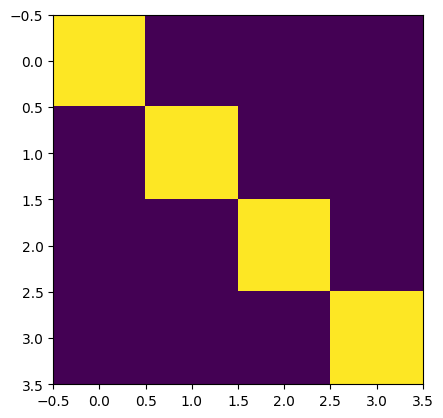

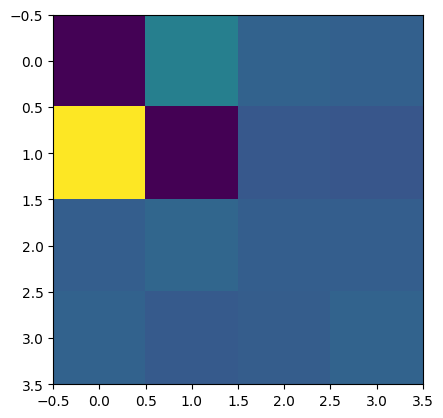

In [34]:
plt.imshow(A @ inv(A))
plt.show()

plt.imshow(A * inv(A))
plt.show()

Funkcja [`imshow`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) pozwala na dowolne zakodowanie wartości liczbowych w kolorach (parametr `cmap`).

**Zapamiętaj**: <font color='blue'>notacja macierzowa</font> i <font color='orange'>zapis operacji macierzowych w bibliotece ```numpy``` </font> to dwie różne konwencje. Wynika to z tego, że *cele zapisu matematycznego* i *cele narzędzia programistycznego* są nieco różne. <br>
Celem biblioteki ```numpy``` jest dostarczenie zwięzłego i wygodnego w użyciu zapisu tych operacji i przekształceń, które najczęściej wykonuje się w praktyce na zbiorach danych i ich fragmentach. **Samodzielnie się zastanów**, jakie są cele notacji matematycznej związanej z macierzami (a najlepiej przypomnij sobie z kursu algebry liniowej). <br>
Oczywiście, pewne elementy obu notacji są podobne. Oto one: <br>
$A^{-1} \quad \rightarrow \quad$ ```inv(A)``` <br>
$A^{\text{T}} \quad \rightarrow \quad$ ```A.T``` <br>
$A\cdot B \quad \rightarrow \quad$  ``` A @ B``` lub ```np.dot(A,B) ``` <br>
Notacja pewnych często wykonywanych na danych operacji została w bibliotece ```numpy``` uproszczona dla przejrzystości, zwięzłości kodu i optymalizacji wykonania. Te uproszczenia nie występują w notacji matematycznej (bo tam nie byłyby one uproszczeniami), <font color='red'>**uważaj**</font> więc, by nie przenosić tych elementów do matematyki. Oto garść przykładów: <br>
```A - 1 ``` - odejmowanie skalara od wszystkich elementów macierzy, <br>
``` A*B ``` - mnożenie element po elemencie (ang. *element-wise*), <br>
``` A**2 ``` - potęgowanie elementów macierzy, <br>
itd.

### Generatory liczb losowych

Przedstawione tutaj funkcje generują tabelę o zadanych wymiarach wypełnioną losowymi wartościami. <br>
Z nazwy i wyniku łatwo się domyślić działania funkcji i przeznaczenia jej parametrów. <br>
Jeżeli coś jest niejasne, pamiętaj: trzeba **eksperymentować z kodem**. 

In [39]:
np.random.choice(["Orzeł", "Reszka"], p=[0.9, 0.1], size=8)

array(['Orzeł', 'Orzeł', 'Orzeł', 'Orzeł', 'Orzeł', 'Orzeł', 'Orzeł',
       'Orzeł'], dtype='<U6')

In [41]:
np.random.randint(low=1, high=7, size=20)

array([5, 6, 1, 3, 2, 4, 5, 4, 5, 6, 5, 2, 1, 5, 4, 2, 5, 4, 4, 2])

In [42]:
np.random.uniform(low=-1, high=1, size=7)  # popatrz również np.random.rand()

array([-0.28756871,  0.47761382, -0.2685228 ,  0.09571565,  0.94201917,
       -0.80007452, -0.16311281])

In [75]:
np.random.normal(loc=80, scale=5, size=10)  # popatrz również np.random.randn()

array([78.98006682, 78.32708895, 78.28442375, 82.64487566, 82.22445471,
       80.06254368, 88.15822588, 78.42083138, 78.32046452, 83.07845177])

In [86]:
np.random.binomial(n=100, p=0.5, size=10)

array([50, 55, 44, 44, 48, 54, 53, 47, 45, 49])

In [99]:
np.random.poisson(lam=1, size=10)

array([0, 2, 2, 0, 2, 0, 3, 1, 0, 3])

**Ćwiczenie 3**: Czy wiesz w jaki sposób zmusić generator liczb pseudolosowych (PRNG) do zwrócenia kilkukrotnie tych samych wartości? Przeczytaj na temat ziarna (ang. seed) PRNG i przy pomocy pakietu numpy wygeneruj dwukrotnie losowe 10-elementowe tablice, które będą miały te same wartości.

<font color='green'>Laboratorium zjawisk losowych </font><br>
Nieuzbrojona intuicja ludzka słabo radzi sobie z losowością. Symulacje z wykorzystaniem przedstawionych generatorów pozwalają wyrobić sobie właściwe wyczucie różnych rodzajów i objawów zjawisk losowych.

Przykładów jest tu wiele, raczej do przejrzenia i przeanalizowania w domu, z zamierzeniem by bawiąc uczyły.

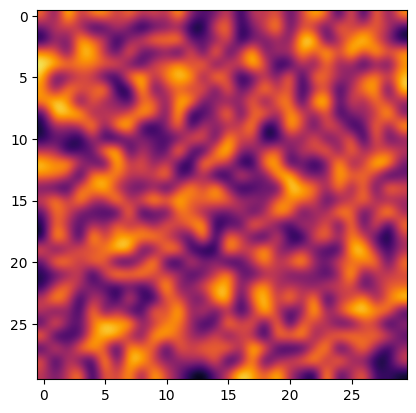

In [112]:
A = np.random.randint(0, 256, size=(30, 30))
plt.imshow(A, interpolation="bicubic", cmap=plt.cm.inferno)
plt.show()

Czy powyższy obrazek zawiera jakieś regularności?

Oto przykład tak zwanego spaceru/błądzenia losowego (ang. *random walking*).

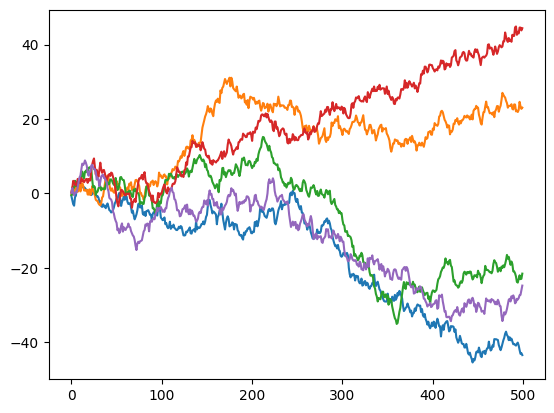

In [113]:
x = np.random.normal(0, 1, size=(500, 5)).cumsum(axis=0)
plt.plot(x)
plt.show()

Czy te wykresy przypominają kursy akcji na giełdzie?

Oto błądzenie na płaszczyźnie.

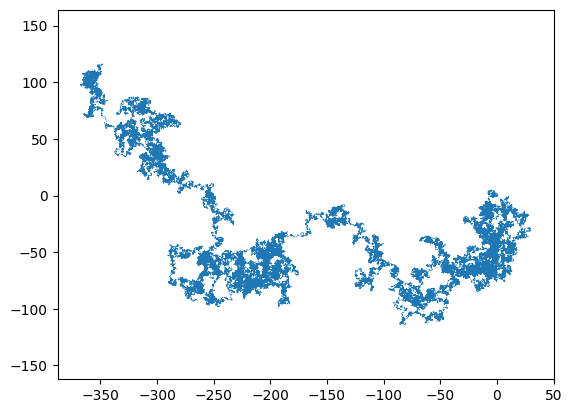

In [119]:
x = np.random.normal(0, 0.1, size=(2000000, 2)).cumsum(axis=0)
plt.plot(x[:, 0], x[:, 1], linewidth=0.1)
plt.axis("equal")
plt.show()

Różnicę między rozkładem równomiernym (jednostajnym) a normalnym powinien zrozumieć nawet laik, jeżeli zobaczy efekt działania tego kodu.

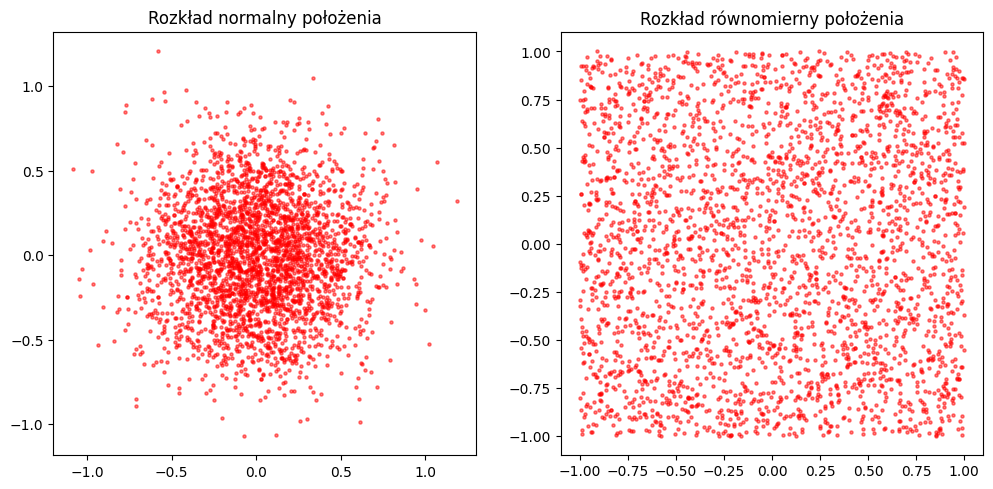

In [120]:
N = 3000

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

X = np.random.normal(loc=0, scale=1 / 3, size=N)
Y = np.random.normal(loc=0, scale=1 / 3, size=N)

ax[0].scatter(X, Y, s=5, color="red", alpha=0.5)
ax[0].set_aspect("equal")
ax[0].set_title("Rozkład normalny położenia")
X = np.random.uniform(low=-1, high=1, size=N)
Y = np.random.uniform(low=-1, high=1, size=N)
ax[1].scatter(X, Y, s=5, color="red", alpha=0.5)
ax[1].set_aspect("equal")
ax[1].set_title("Rozkład równomierny położenia")

plt.show()

Tutaj widać już pewien efekt, na którym pierwotna intuicja może się łatwo wyłożyć. <br>
Wykonaj eksperyment na intuicji. Pokaż laikowi/laiczce wcześniejsze dwa obrazki, aby złapał/a różnicę między rozkładem równomiernym a normalnym. Następnie zademonstruj dwa poniższe obrazki, ale bez tytułów. Niech spróbuje odgadnąć, na którym rozmiary kółek generowane są z rozkładu równomiernego a na którym z normalnego.

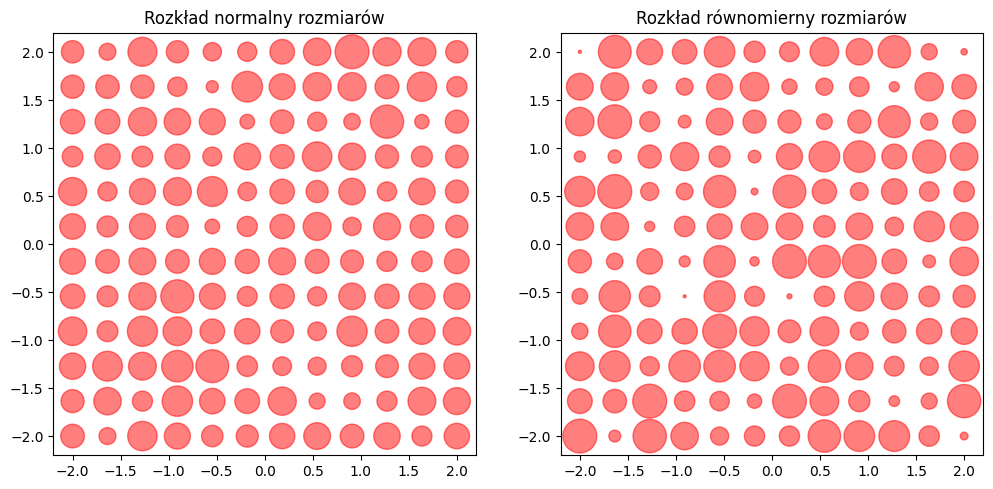

In [132]:
N = 12
x = np.linspace(start=-2, stop=2, num=N)
y = np.linspace(start=-2, stop=2, num=N)
X, Y = np.meshgrid(x, y)
X = X.flatten()
Y = Y.flatten()

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

rozmiar = np.random.normal(loc=300, scale=100, size=N * N)
ax[0].scatter(X, Y, s=rozmiar, color="red", alpha=0.5)
ax[0].set_aspect("equal")
ax[0].set_title("Rozkład normalny rozmiarów")

rozmiar = np.random.uniform(low=0, high=600, size=N * N)
ax[1].scatter(X, Y, s=rozmiar, color="red", alpha=0.5)
ax[1].set_aspect("equal")
ax[1].set_title("Rozkład równomierny rozmiarów")

plt.show()

Poniżej inspiracja do wykonania własnych sprytnych eksperymentów z rozmiarami i kolorami jednocześnie. 

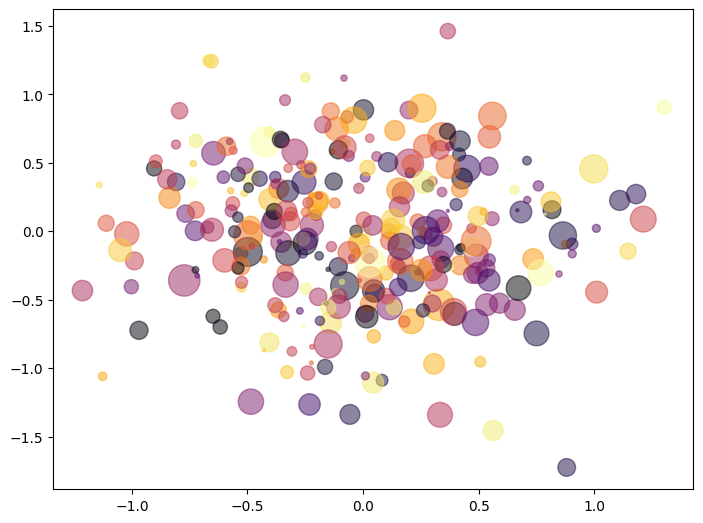

In [140]:
mapa_kolorow = cmap = plt.get_cmap("inferno")

N = 300
X = np.random.normal(0, 0.5, N)
Y = np.random.normal(0, 0.5, N)
rozmiar = 200 * abs(np.random.normal(0, 1, N))
kolor = abs(np.random.uniform(0, 1, N))

plt.axes([0, 0, 1, 1])
plt.scatter(X, Y, s=rozmiar, c=kolor, alpha=0.5, cmap=mapa_kolorow)

plt.show()

Generatorem liczb losowych można numerycznie przybliżyć wartość całki (i wielu innych ciekawych rzeczy). Spróbuj bez zaglądania do internetu, jedynie na podstawie kodu odgadnąć sposób działania *metody Monte Carlo*.

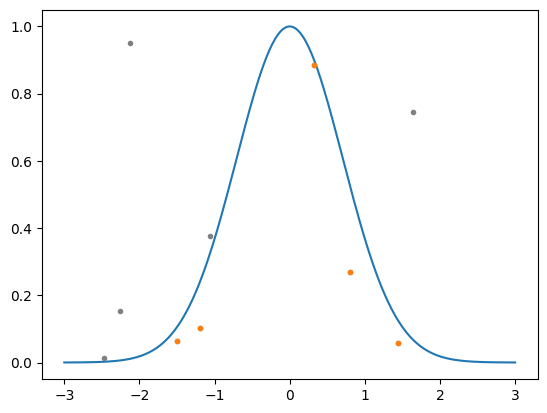

2.9993277757442773


In [162]:
def f(x):
    return np.exp(-(x**2))


a, b = -3, 3
os_x = np.linspace(start=a, stop=b, num=300)
os_y = f(os_x)
ymin, ymax = os_y.min(), os_y.max()
N = 10
x = np.random.uniform(a, b, size=(1, N))
fx = f(x)
y = np.random.uniform(ymin, ymax, size=(1, N))

p_wew = y < fx
x_wew = x[p_wew]
y_wew = y[p_wew]

plt.plot(os_x, f(os_x))
plt.plot(x, y, ".", color="gray")
plt.plot(x_wew, y_wew, ".", color="tab:orange")
plt.show()

licznik = x_wew.size / x.size
print(licznik * (b - a) * (ymax - ymin))

### Zdobywanie rzeczywistych zbiorów danych
W toku dalszych zajęć przyda się jakiś zbiór zawierajcy prawdziwe dane, na którym można będzie sprawdzić działanie poznawanych metod i narzędzi. Możesz wówczas dowolnie korzystać z przedstawionych kodów, również jako inspiracja do własnych poszukiwań. 
<br> Ta część notatnika jest przeznaczona raczej do przejrzenia w domu. Na pewno **nie staraj się teraz analizować dogłębnie kodów**. Zrobisz to, jeżeli zechcesz użyć któregoś z zaproponowanych lub podobnych źródeł danych. 

Przedstawione zostaną:


*   gotowce z repozytoriów służących do uczenia się korzystania z pakietów uczenia maszynowego,
*   dane wyekstrahowane ze stron www,
*   zwyczajne pliki,
*   zapytania do wyszukiwarki ([Google Trends](https://trends.google.pl/trends/?geo=PL)),
*   [Meteostat](https://meteostat.net/en/) jako przykład pozyskiwania danych za pomocą specjalnego API.



Nie jest to oczywiście kompletna lista możliwości. Należy ją traktować jako pierwszy krok w stronę zdobywania własnych, rzeczywistych i aktualizowanych na bieżąco zbiorów danych.

__Gotowce__ na potrzeby testowania metod analizy danych i uczenia maszynowego. <br>
Dobre na początek, ale nie zastąpią wiedzy, jaką daje praca z danymi zdobytymi i opracowanymi samodzielnie.

Biblioteka [Scikit-learn](https://scikit-learn.org/stable/datasets.html) zawiera kilka zbiorów, na któych można szkolić swoje umiejętności.

In [163]:
from sklearn import datasets

# datasets.load_digits()
# datasets.load_boston()
datasets.load_iris()

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

Biblioteka [Seaborn](https://seaborn.pydata.org/generated/seaborn.load_dataset.html) świadczy podobne usługi, ale dane od razu są umieszczone w ramce danych.

In [165]:
from seaborn import load_dataset

df = load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


[Kaggle](https://www.kaggle.com/datasets) to serwis udostępniający mnóstwo zbiorów danych oraz materiałów szkoleniowych z zakresu ich analizy i uczenia maszynowego.

**Ekstrakcja danych ze stron internetowych** (ang. *web scraping*) <br>
Za pomocą biblioteki `requests` wysłane będzie żądanie HTTP. <br>
Uzyskany kod HTML zostanie sparsowany z użyciem metod biblioteki `BeautifulSoup` do postaci drzewa wyszukiwań, z którego można wydobywać potrzebne dane.

In [170]:
import pandas as pd  # jeżeli docelowo chcesz umieścić dane w ramce
import requests
import lxml
from bs4 import BeautifulSoup  # ważna alternatywa: Selenium

URL = "https://pl.wikipedia.org/wiki/Dane_statystyczne_o_miastach_w_Polsce"
resp = requests.get(URL)
if resp.status_code == 200:  # czy stronę udało się otworzyć?
    soup = BeautifulSoup(resp.content, "html.parser")  # utworzenie drzewa wyszukiwań
    tab = soup.find(
        "table", {"class": "wikitable"}
    )  # ekstrakcja tabel z drzewa wyszukiwań
    df = pd.read_html(str(tab))[
        0
    ]  # konwersja pierwszej znalezionej tabeli do ramki danych
    df.head()

ImportError: lxml not found, please install it

Dalej następuje już przetwarzanie ramki, jak w notatniku do pierwszych zajęć.

**Pobieranie plików** udostępnianych przez organizacje. <br>
Posłużymy się biblioteką `urllib`, która pozwala nie tylko na wysyłanie żądań HTML, ale również na autentykację, obsługę ciasteczek, przekierowań oraz - co najważniejsze - pobieranie plików spod wskazanego adresu. <br>
Pliki mogą być duże. Zasady dobrego wychowania wymagają, żeby nie wykonywać pobierania bez potrzeby (np. gdy plik już jest na dysku, ale użytkownik klika uporczywie w przycisk wykonaj). Biblioteka standardowa `os` zajmie się sprawdzaniem, czy plik, który trzeba pobrać, znajduje się już na dysku. <br>
Pisząc skrypty do pobierania danych (zwłaszcza takie, z których będą korzystać inni), koniecznie musisz zabezpieczać się przed niezamierzonym atakiem na czyjś serwer.

In [171]:
import urllib.request
import os

# plik jest duży, uzbrój się w cierpliwość przy pobieraniu i ładowaniu do przestrzeni roboczej

plik = "owid-covid-data.csv"
URL = "https://covid.ourworldindata.org/data/" + plik
if not os.path.isfile(plik):  # czy pliku już wcześniej nie pobierano?
    print("Pobieram plik ", URL)
    urllib.request.urlretrieve(URL, plik)  # właściwa linia, gdzie plik jest pobierany
    print("Pobrano.")
else:
    print("Plik już jest na dysku.")

Pobieram plik  https://covid.ourworldindata.org/data/owid-covid-data.csv
Pobrano.


In [172]:
dane = pd.read_csv(plik)

dane["date"] = pd.DatetimeIndex(
    dane["date"]
)  # zmiana daty z łańcucha tesktowego na interpretowalną datę
dane.set_index("date", inplace=True)  # niech wiersze będą indeksowane datą
dane.sample(4)  # pokaż 4 losowe wiersze

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2020-10-01,BOL,South America,Bolivia,133222.0,0.0,453.000,7800.0,0.0,35.714,10898.295,...,NaN,25.383,1.10,71.51,0.718,12224114.0,NaN,NaN,NaN,NaN
2020-08-07,ISL,Europe,Iceland,1927.0,0.0,8.429,10.0,0.0,0.000,5167.564,...,15.2,NaN,2.91,82.99,0.949,372903.0,NaN,NaN,NaN,NaN
2021-11-07,LAO,Asia,Laos,47056.0,6785.0,969.286,82.0,17.0,2.429,6249.571,...,51.2,49.839,1.50,67.92,0.613,7529477.0,NaN,NaN,NaN,NaN
2023-12-23,FJI,Oceania,Fiji,69047.0,0.0,0.000,885.0,0.0,0.000,74262.532,...,34.8,NaN,2.30,67.44,0.743,929769.0,NaN,NaN,NaN,NaN


In [173]:
print("Liczba państw:", len(dane["location"].unique()), "\n")

Liczba państw: 255 



Dane o zachorowaniach mają cykl 7 dniowy. Charakterystyczne jest to, że w soboty i niedziele rejestruje się mniej zachorowań niżw tygodniu, za to w poniedziałek ujawniają się te przypadki, którym nie udało się w dni krótszej pracy laboratoriów diagnostycznych. Dlatego warto potraktować szereg czasowy zachorowań średnią ruchomą (ang. *Moving Average*) na oknie o długości 7. Okno z szeregu wybiera się metodą `rolling`, a na oknie tym wykonamy operację uśredniania `mean`.

Nowy szereg wyliczony z surowych danych dostawimy metodą `insert` jako nową kolumnę ramki. 

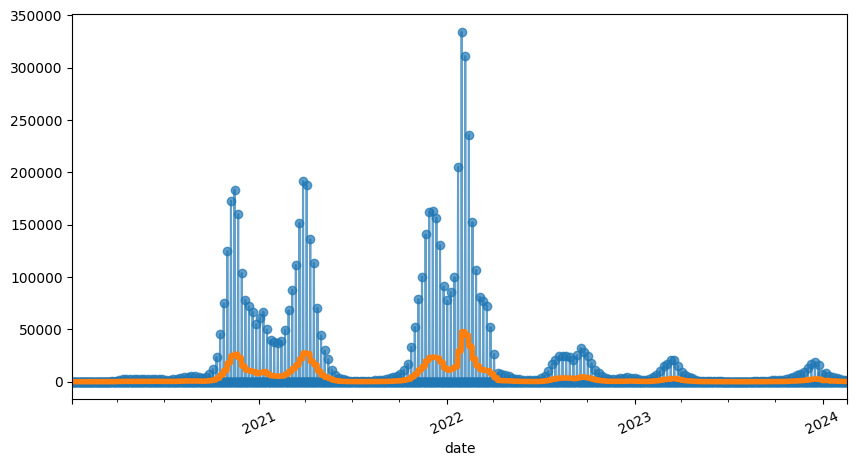

In [174]:
dane_Pol = dane[dane["location"] == "Poland"]
cecha = "new_cases"
dane_Pol.insert(1, "MA_" + cecha, dane_Pol[cecha].rolling(7).mean())

dane_Pol[cecha].plot(rot=25, figsize=(10, 5), marker="o", alpha=0.7)
dane_Pol["MA_" + cecha].plot(rot=25, figsize=(10, 5), linewidth=4)
plt.show()

#### Dostęp za pomocą specjalistycznych **API**

**Meteostat** 

In [179]:
!pip install meteostat
!pip install joypy

In [180]:
import meteostat
from datetime import datetime  # chcemy aby data była datą, a nie stringiem
import joypy

Metoda `Stations` daje dostęp do listy stacji meteorologicznych, z których możemy uzyskiwać dane pomiarowe. Metoda `nearby` zwraca stację, która znajduje się najbliżej podanym współrzędnym geograficznym. <br>
Pobranie danych (o stacji lub samych pomiarów) odbywa się za pomocą metody `fetch`. Jak dobrze, że od razu zwracana jest ramka danych.

In [182]:
# określamy zakres dat do wybrania pomiarów
rok = 2022
start, end = datetime(rok, 1, 1), datetime(rok, 12, 31)

# namierzamy stację meteorologiczną
stacje = meteostat.Stations()
wroclaw = stacje.nearby(51, 17)
wroclaw = wroclaw.fetch(1)

# pobieramy z niej dane z rozdzielczością dnia (meteostat.Daily)
pomiary = meteostat.Daily(wroclaw, start, end)
pomiary = pomiary.fetch()
pomiary

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2022-01-01,11.1,9.4,11.9,NaN,NaN,286.0,15.6,40.8,1021.5,NaN
2022-01-02,9.2,4.4,12.0,NaN,NaN,210.0,13.4,38.9,1016.1,NaN
2022-01-03,9.5,7.4,11.2,NaN,NaN,260.0,23.3,61.1,1008.7,NaN
2022-01-04,7.5,5.2,9.2,NaN,NaN,206.0,12.2,24.1,998.4,NaN
2022-01-05,4.3,1.6,6.4,NaN,NaN,246.0,15.3,38.9,1000.1,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-12-27,4.9,1.5,9.5,3.4,NaN,271.0,20.3,44.5,1022.7,NaN
2022-12-28,5.2,-1.3,7.8,0.0,NaN,219.0,18.3,37.0,1019.8,NaN
2022-12-29,8.8,6.4,10.9,0.0,NaN,215.0,20.1,40.8,1011.6,NaN


Przypiszemy daty do konkretnych miesięcy z nazwami w języku polskim. Chcemy ponadto. aby biblioteka do rysowania ,,rozumiała'' następstwo miesięcy. Te wymagania zapewni niestandardowy typ danych `CategoricalDtype` biblioteki `pandas`. <br>
**Przypominam**: to nie są kody, które w ramach kursu należy opanowywać. Wystarczy umieć z nich korzystać, jeżeli zajdzie taka potrzeba. Niemniej warto zdawać sobie sprawę, że rolą bibliotek jest również dostarczanie wyspecjalizowanych typów danych służących do eleganckiego rozwiązywania często pojawiających się problemów. 

In [183]:
from pandas.api.types import CategoricalDtype

miesiace_dict = {
    1: "Styczeń",
    2: "Luty",
    3: "Marzec",
    4: "Kwiecień",
    5: "Maj",
    6: "Czerwiec",
    7: "Lipiec",
    8: "Sierpień",
    9: "Wrzesień",
    10: "Październik",
    11: "Listopad",
    12: "Grudzień",
}

kat_mies = CategoricalDtype(list(miesiace_dict.values()))

# przypisz dacie miesiąc ze słownika miesiace_dict
pomiary["Miesiąc"] = [miesiace_dict[elem.month] for elem in pomiary.index]
# i konwertuj je na szyty na miarę typ kategorialny kat_mies
pomiary["Miesiąc"] = pomiary["Miesiąc"].astype(kat_mies)
pomiary.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,Miesiąc
time,,,,,,,,,,,
2022-01-01,11.1,9.4,11.9,NaN,NaN,286.0,15.6,40.8,1021.5,NaN,Styczeń
2022-01-02,9.2,4.4,12.0,NaN,NaN,210.0,13.4,38.9,1016.1,NaN,Styczeń
2022-01-03,9.5,7.4,11.2,NaN,NaN,260.0,23.3,61.1,1008.7,NaN,Styczeń
2022-01-04,7.5,5.2,9.2,NaN,NaN,206.0,12.2,24.1,998.4,NaN,Styczeń
2022-01-05,4.3,1.6,6.4,NaN,NaN,246.0,15.3,38.9,1000.1,NaN,Styczeń


In [185]:
dane = pomiary[["tavg", "Miesiąc"]]  # wybieramy tylko te dwie kolumny
dane

,tavg,Miesiąc
time,,
2022-01-01,11.1,Styczeń
2022-01-02,9.2,Styczeń
2022-01-03,9.5,Styczeń
2022-01-04,7.5,Styczeń
2022-01-05,4.3,Styczeń
...,...,...
2022-12-27,4.9,Grudzień
2022-12-28,5.2,Grudzień
2022-12-29,8.8,Grudzień


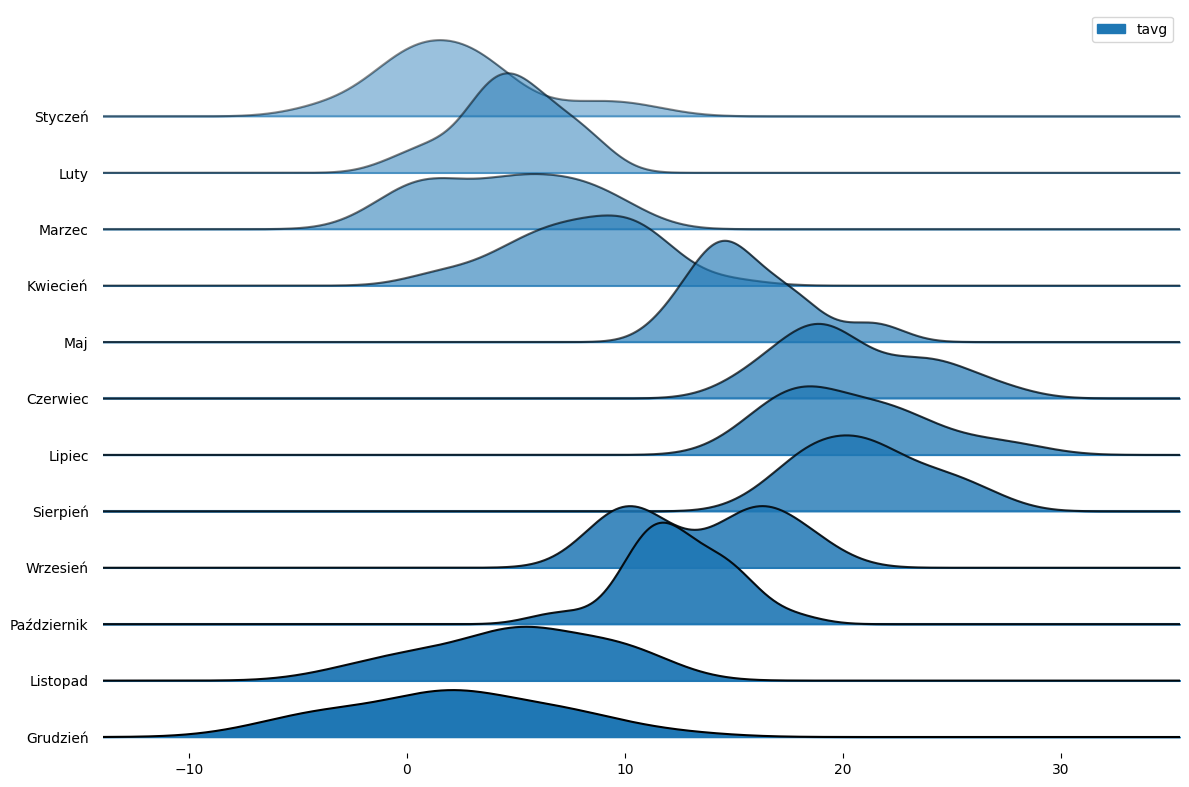

In [186]:
joypy.joyplot(
    data=dane, by="Miesiąc", figsize=(12, 8), fade=True, alpha=0.7, legend=True
)
plt.show()

**Google Trends** 

Jest to znakomite źródło danych o zainteresowaniach i zamierzeniach całego społeczeństwa. Duże firmy badają w ten sposób zachowania potencjalnych klientów. 

Najprawdopodobniej trzeba będzie zainstalować bibliotekę dostępową `pytrends`. Jest to nieoficjalne API do Google Trends.

**UWAGA**: Z racji, iż jest to nieoficjalne API, to zmiany po stronie Google mogą powodować nieprawidłowe działanie biblioteki.

In [187]:
!pip install pytrends

Klasa/obiekt `TrendReq` daje dostęp do aktualnych danych na temat żądań użytkowników wpisywanych do wyszukiwarki. Przy okazji: w Pythonie klasa realizowana jest jako obiekt, a instancje po prostu dziedziczą po tym nadrzędnym obiekcie. 

In [188]:
from pytrends.request import TrendReq

pytrend = TrendReq()  # tworzymy instancję klasy/obiektu TrendReq

In [189]:
keyword = "Wiedźmin"
pytrend.build_payload(
    kw_list=[keyword]
)  # przygotowanie obiektu pytrend do realizacji zapytań o listę słów kluczowych

<Axes: xlabel='geoName'>

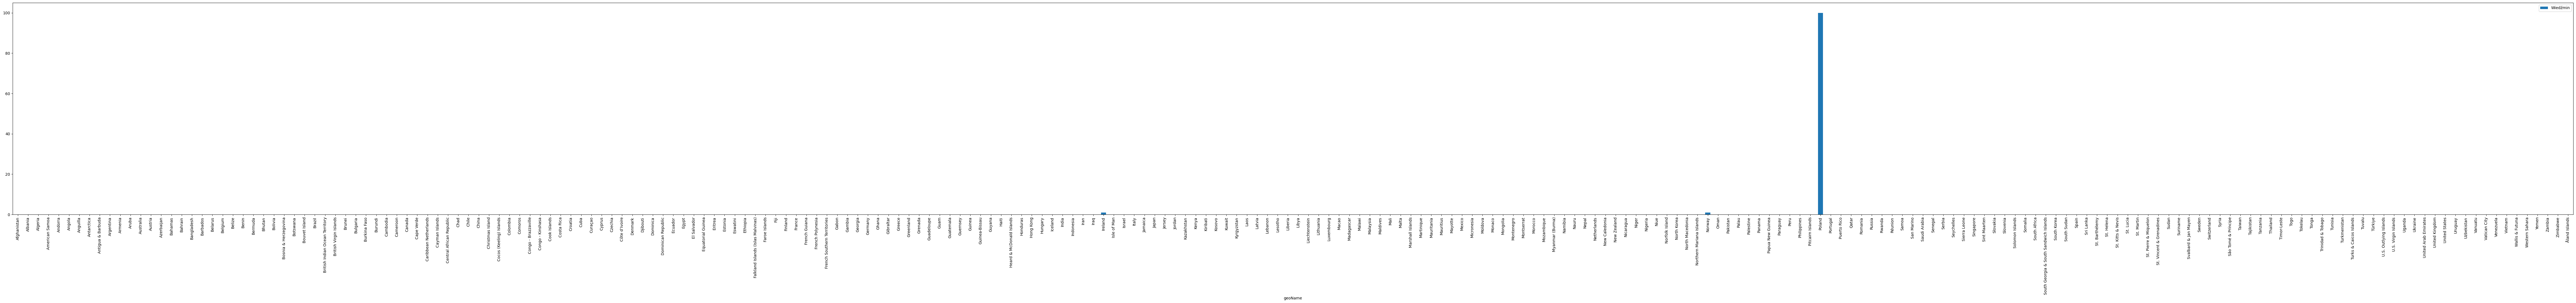

In [190]:
df = pytrend.interest_by_region()
df.reset_index().plot(x="geoName", y=keyword, figsize=(120, 10), kind="bar")

**Pamiętaj!**

To tylko przykłady, z któych możesz czerpać. Na tym etapie swojej edukacji nie ma potrzeby analizowania tych kodów. Wystarczy umiejętność zaadaptowania ich na potrzeby pobrania własnego zbioru danych.